## Pre-Processing Data

In [1]:
#import library
import pandas as pd
import numpy as np

In [2]:
#input data installment.csv 
installment = pd.read_csv('installment_payment.csv')
installment = installment.drop(['Unnamed: 0'], axis = 1)
installment.isnull().sum()

SK_ID_PREV       0
LN_ID            0
INST_NUMBER      0
INST_DAYS        0
PAY_DAYS       673
AMT_INST         0
AMT_PAY        673
dtype: int64

In [3]:
#mengisi nilai null pada data installment dengan nilai 0
installment = installment.fillna(value = 0)
installment.isnull().sum()

SK_ID_PREV     0
LN_ID          0
INST_NUMBER    0
INST_DAYS      0
PAY_DAYS       0
AMT_INST       0
AMT_PAY        0
dtype: int64

In [4]:
#mengambil item pada atribut SK_ID_PREV
id_prev = installment.SK_ID_PREV.unique()

In [5]:
#melihat histori pembayaran cicilan dari debitur di pinjaman sebelumnya
telat = []
uang = []
hari = []
ln_id = []

for item in id_prev:
    t = 0
    u = 0
    data = installment[installment.SK_ID_PREV ==item]
    inst_days = data['INST_DAYS'].to_list()
    pay_days = data['PAY_DAYS'].to_list()
    amt_inst = data['AMT_INST'].to_list()
    amt_pay = data['AMT_PAY'].to_list()
    id_ln = data['LN_ID'].to_list()
    for i in range(len(inst_days)):
        if inst_days[i] - pay_days[i] >= 30:
            t = t + 1
        if amt_inst[i] - amt_pay[i] != 0:
            u = u + 1
    telat.append(t)
    uang.append(u)
    hari.append(len(data))
    ln_id.append(id_ln[0])

In [6]:
data_installment = {'SK_ID_PREV': id_prev, 'LN_ID': ln_id, 'TERM_PAYMENT': hari, 'LATE_FREQUENCY': telat, 'MINUS': uang}
data_installment = pd.DataFrame(data_installment)
data_installment = data_installment.sort_values(['SK_ID_PREV'], ascending=[True])
data_installment

,SK_ID_PREV,LN_ID,TERM_PAYMENT,LATE_FREQUENCY,MINUS
92610,1000020,299072,12,0,0
199036,1000023,350748,4,0,0
149028,1000024,448518,12,0,0
91718,1000026,227096,4,0,0
67043,1000027,277601,6,0,0
...,...,...,...,...,...
185707,2843484,229590,16,2,8
101411,2843489,387308,25,1,2
90350,2843490,294719,4,0,0
105228,2843493,337804,31,0,2


In [7]:
#input data prev_app.csv (data pinjaman debitur di periode sebelumnya)
prev = pd.read_csv('prev_app.csv')
prev = prev.drop(['Unnamed: 0'], axis = 1)
prev.isnull().sum()

SK_ID_PREV                        0
LN_ID                             0
CONTRACT_TYPE                     0
ANNUITY                       76609
APPLICATION                       0
APPROVED_CREDIT                   0
AMT_DOWN_PAYMENT             186507
PRICE                         79640
WEEKDAYS_APPLY                    0
HOUR_APPLY                        0
CONTRACT_STATUS                   0
DAYS_DECISION                     0
TERM_PAYMENT                  76609
YIELD_GROUP                       0
FIRST_DRAW                   139305
FIRST_DUE                    139305
TERMINATION                  139305
NFLAG_INSURED_ON_APPROVAL    139305
dtype: int64

In [8]:
#mengambil atribut yang penting untuk melihat kemampuan pembayaran cicilan debitur di pinjaman sebelumnya
data_prev = prev.drop(['CONTRACT_TYPE', 'ANNUITY', 'APPLICATION', 'AMT_DOWN_PAYMENT', 'PRICE', 'WEEKDAYS_APPLY', 'HOUR_APPLY', 'DAYS_DECISION', 'FIRST_DRAW', 'FIRST_DUE', 'TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'], axis = 1)
data_prev = data_prev.sort_values(['SK_ID_PREV'], ascending=[True])
data_prev.isnull().sum()

SK_ID_PREV             0
LN_ID                  0
APPROVED_CREDIT        0
CONTRACT_STATUS        0
TERM_PAYMENT       76609
YIELD_GROUP            0
dtype: int64

In [9]:
#mengisi data yang kosong dengan 0
data_prev = data_prev.fillna(value = 0)

In [10]:
#menyingkronisasikan data histori cicilan dan pinjaman (apakah cicilan yang dibayarkan dan periode cicilan sesuai dengan aplikasi kredit)
sk_id_prev = data_prev.SK_ID_PREV.unique()

lf = []
mi = []
p = []
for item in sk_id_prev:
    data1 = data_installment[data_installment.SK_ID_PREV==item]
    data2 = data_prev[data_prev.SK_ID_PREV==item]
    tp1 = data1['TERM_PAYMENT'].to_list()
    tp2 = data2['TERM_PAYMENT'].to_list()
    if tp1 == tp2:
        p.append(0)
    else:
        p.append(1)
    l = data1['LATE_FREQUENCY'].to_list()
    m = data1['MINUS'].to_list()
    if len(data1) != 0:
        lf.append(l[0])
        mi.append(m[0])
    elif len(data1) == 0:
        lf.append(0)
        mi.append(0)

In [11]:
data_prev['LATE_FREQUENCY'] = lf
data_prev['MINUS'] = mi
data_prev['TERM_PAYMENT'] = p
data_prev

,SK_ID_PREV,LN_ID,APPROVED_CREDIT,CONTRACT_STATUS,TERM_PAYMENT,YIELD_GROUP,LATE_FREQUENCY,MINUS
30136,1000020,299072,164961.0,Approved,0,high,0,0
343046,1000023,350748,81130.5,Approved,1,high,0,0
138097,1000024,448518,24430.5,Approved,0,high,0,0
100632,1000026,227096,129811.5,Approved,1,low_normal,0,0
49431,1000027,277601,46485.0,Approved,0,middle,0,0
...,...,...,...,...,...,...,...,...
157839,2845335,310483,0.0,Canceled,1,NA1,0,0
210392,2845361,337717,0.0,Canceled,1,NA1,0,0
274218,2845369,445190,98383.5,Refused,1,middle,0,0
60746,2845378,100125,59503.5,Refused,1,middle,0,0


In [12]:
print(data_prev.YIELD_GROUP.unique())
print(data_prev.CONTRACT_STATUS.unique())

['high' 'low_normal' 'middle' 'NA1' 'low_action']
['Approved' 'Refused' 'Canceled' 'Unused offer']


In [13]:
#mengkategorikan atribut kontrak status dan tingkat suku bunga ke dalam nilai angka
cs = data_prev['CONTRACT_STATUS'].to_list()
yg = data_prev['YIELD_GROUP'].to_list()
cc = []
yy = []
for i in range(len(cs)):
    if cs[i] == 'Approved':
        c = 0
    elif cs[i] == 'Refused':
        c = 1
    elif cs[i] == 'Canceled':
        c = 2
    elif cs[i] == 'Unused offer':
        c = 3
    if yg[i] == 'high':
        y = 2
    elif yg[i] == 'low_normal':
        y = 0
    elif yg[i] == 'middle':
        y = 1
    elif yg[i] == 'NA1':
        y = 3
    elif yg[i] == 'low_action':
        y = 4
    cc.append(c)
    yy.append(y)

data_prev['CONTRACT_STATUS'] = cc
data_prev['YIELD_GROUP'] = yy
data_prev = data_prev.drop(['SK_ID_PREV'], axis = 1)

In [14]:
ln_id = data_prev.LN_ID.unique()
aa = []
bb = []
cc = []
dd = []
ee = []
ff = []
for item in ln_id:
    data = data_prev[data_prev.LN_ID==item]
    APPROVED_CREDIT = data['APPROVED_CREDIT'].to_list()
    CONTRACT_STATUS = data['CONTRACT_STATUS'].to_list()
    TERM_PAYMENT = data['TERM_PAYMENT'].to_list()
    YIELD_GROUP = data['YIELD_GROUP'].to_list()
    LATE_FREQUENCY = data['LATE_FREQUENCY'].to_list()
    MINUS = data['MINUS'].to_list()
    a = sum(APPROVED_CREDIT)/len(data)
    b = sum(CONTRACT_STATUS)/len(data)
    c = sum(TERM_PAYMENT)/len(data)
    d = sum(YIELD_GROUP)/len(data)
    e = sum(LATE_FREQUENCY)/len(data)
    f = sum(MINUS)/len(data)
    aa.append(a)
    bb.append(b)
    cc.append(c)
    dd.append(d)
    ee.append(e)
    ff.append(f)
    
data_prevv = {'LN_ID': ln_id, 'APPROVED_CREDIT': aa, 'CONTRACT_STATUS': bb, 'TERM_PAYMENT': cc, 'YIELD_GROUP': dd, 'LATE_FREQUENCY': ee, 'MINUS': ff}
data_prevv = pd.DataFrame(data_prevv)
data_prevv = data_prevv.sort_values(['LN_ID'], ascending=[True])
data_prevv

,LN_ID,APPROVED_CREDIT,CONTRACT_STATUS,TERM_PAYMENT,YIELD_GROUP,LATE_FREQUENCY,MINUS
17283,100009,70137.642857,0.00,0.142857,1.571429,0.00,0.0
5098,100039,383785.875000,0.50,0.750000,1.750000,2.00,1.5
20177,100044,299743.875000,0.00,0.750000,1.000000,4.00,1.5
34847,100045,368978.625000,0.00,0.500000,1.000000,0.25,1.5
29186,100046,481817.250000,0.50,1.000000,0.000000,0.00,0.0
...,...,...,...,...,...,...,...
41345,456247,59184.000000,0.20,0.400000,1.000000,0.00,0.0
20073,456248,636604.875000,0.00,0.500000,2.500000,0.50,2.0
70814,456249,158699.250000,0.50,0.500000,3.000000,0.00,0.0
47929,456252,56821.500000,0.00,0.000000,0.000000,0.00,0.0


In [15]:
#membuat score untuk atribut yang penting dalam melihat kemampuan debitur dalam membayar kredit
ln_id = data_prevv.LN_ID.unique()
mean = sum(data_prevv['APPROVED_CREDIT'])/len(data_prevv['APPROVED_CREDIT'])
j = []
for item in ln_id:
    data = data_prevv[data_prevv.LN_ID==item]
    cs = data['CONTRACT_STATUS'].to_list()
    tp = data['TERM_PAYMENT'].to_list()
    yg = data['YIELD_GROUP'].to_list()
    lf = data['LATE_FREQUENCY'].to_list()
    m = data['MINUS'].to_list()
    if cs[0] >= mean:
        cs = 0
    elif cs[0] < mean:
        cs = 1
    jum = cs+tp[0]+yg[0]+lf[0]+m[0]
    j.append(jum)

data_prevv['Behavior'] = j

In [16]:
#memasukkan data training
data_train = pd.read_csv('app_train.csv')
data_train = data_train.drop(['Unnamed: 0'], axis = 1)
data_train.isnull().sum()

LN_ID                    0
TARGET                   0
CONTRACT_TYPE            0
GENDER                   0
NUM_CHILDREN             0
INCOME                   0
APPROVED_CREDIT          0
ANNUITY                  1
PRICE                   62
INCOME_TYPE              0
EDUCATION                0
FAMILY_STATUS            0
HOUSING_TYPE             0
DAYS_AGE                 0
DAYS_WORK                0
DAYS_REGISTRATION        0
DAYS_ID_CHANGE           0
WEEKDAYS_APPLY           0
HOUR_APPLY               0
ORGANIZATION_TYPE        0
EXT_SCORE_1          34845
EXT_SCORE_2            134
EXT_SCORE_3          12239
dtype: int64

In [17]:
data_train = data_train.drop(['PRICE'], axis = 1)
data_train = data_train.fillna(value = 0)
data_train = data_train.sort_values(['LN_ID'], ascending=[True])

In [18]:
print(data_train.INCOME_TYPE.unique())
print(data_train.NUM_CHILDREN.unique())

['Commercial associate' 'Working' 'Pensioner' 'State servant' 'Unemployed'
 'Student' 'Businessman']
[1 0 2 3 5 4 6 8 7 9]


In [19]:
ln_id = data_train.LN_ID.unique()
meann = sum(j)/len(j)
s = []
for item in ln_id:
    data = data_train[data_train.LN_ID == item]
    data1 = data_prevv[data_prevv.LN_ID == item]
    i = data['INCOME'].to_list()
    a = data['ANNUITY'].to_list()
    r = a[0]/i[0]
    c = data['NUM_CHILDREN'].to_list()
    if c[0] == 0 or c[0] == 1 or c[0] == 2 or c[0] == 3:
        c = 0
    else:
        c = 1
    t = data['TARGET'].to_list()
    it = data['INCOME_TYPE'].to_list()
    if it[0] == 'Commercial associate' or it[0] == 'State servant' or it[0] == 'Businessman' or it == 'Working':
        it = 0
    else:
        it = 1
    b = data1['Behavior'].to_list()
    if len(b) == 0:
        beh = meann
    else:
        beh = b[0]
    ju = r + c + t[0] + it + beh
    s.append(ju)
data_train['Behavior'] = s

ratas = sum(s)/len(s)
a = []
for item in s:
    if item < ratas/2 :
        t = 0
    elif item >= ratas/2 and item < ratas :
        t = 1
    elif item == ratas :
        t = 2
    elif item > ratas and item <= ratas/2+ratas:
        t = 3
    elif item > ratas/2+ratas:
        t = 4
    a.append(t)
data_train['Approval'] = a

In [20]:
#memasukkan data testing
data_test = pd.read_csv('app_test.csv')
data_test = data_test.drop(['Unnamed: 0'], axis = 1)
data_test.isnull().sum()

LN_ID                   0
TARGET                  0
CONTRACT_TYPE           0
GENDER                  0
NUM_CHILDREN            0
INCOME                  0
APPROVED_CREDIT         0
ANNUITY                 0
PRICE                  20
INCOME_TYPE             0
EDUCATION               0
FAMILY_STATUS           0
HOUSING_TYPE            0
DAYS_AGE                0
DAYS_WORK               0
DAYS_REGISTRATION       0
DAYS_ID_CHANGE          0
WEEKDAYS_APPLY          0
HOUR_APPLY              0
ORGANIZATION_TYPE       0
EXT_SCORE_1          8312
EXT_SCORE_2            19
EXT_SCORE_3          2919
dtype: int64

In [21]:
data_test = data_test.drop(['PRICE'], axis = 1)
data_test = data_test.fillna(value = 0)
data_test = data_test.sort_values(['LN_ID'], ascending=[True])

In [22]:
ln_id = data_test.LN_ID.unique()
meann = sum(j)/len(j)
s = []
for item in ln_id:
    data = data_test[data_test.LN_ID == item]
    data1 = data_prevv[data_prevv.LN_ID == item]
    i = data['INCOME'].to_list()
    a = data['ANNUITY'].to_list()
    r = a[0]/i[0]
    c = data['NUM_CHILDREN'].to_list()
    if c[0] == 0 or c[0] == 1 or c[0] == 2 or c[0] == 3:
        c = 0
    else:
        c = 1
    t = data['TARGET'].to_list()
    it = data['INCOME_TYPE'].to_list()
    if it[0] == 'Commercial associate' or it[0] == 'State servant' or it[0] == 'Businessman' or it == 'Working':
        it = 0
    else:
        it = 1
    b = data1['Behavior'].to_list()
    if len(b) == 0:
        beh = meann
    else:
        beh = b[0]
    ju = r + c + t[0] + it + beh
    s.append(ju)
data_test['Behavior'] = s

ratas = sum(s)/len(s)
a = []
for item in s:
    if item < ratas/2 :
        t = 0
    elif item >= ratas/2 and item < ratas :
        t = 1
    elif item == ratas :
        t = 2
    elif item > ratas and item <= ratas/2+ratas:
        t = 3
    elif item > ratas/2+ratas:
        t = 4
    a.append(t)
data_test['Approval'] = a

In [23]:
#membuat variabel dummy untuk data training
contract_type = pd.get_dummies(data_train['CONTRACT_TYPE'], drop_first= True)
gender = pd.get_dummies(data_train['GENDER'], drop_first= True)
education = pd.get_dummies(data_train['EDUCATION'], drop_first= True)
family_status = pd.get_dummies(data_train['FAMILY_STATUS'], drop_first= True)
housing_type = pd.get_dummies(data_train['HOUSING_TYPE'], drop_first= True)
weekdays_apply = pd.get_dummies(data_train['WEEKDAYS_APPLY'], drop_first= True)
organization_type = pd.get_dummies(data_train['ORGANIZATION_TYPE'], drop_first= True)

train = pd.concat([data_train, contract_type, gender, education, family_status, weekdays_apply,organization_type], axis = 1)
train = train.drop(['INCOME_TYPE','CONTRACT_TYPE','GENDER','INCOME_TYPE','EDUCATION','HOUSING_TYPE','FAMILY_STATUS','WEEKDAYS_APPLY','ORGANIZATION_TYPE'],axis = 1)

In [24]:
#membuat variabel dummy untuk data testing
contract_type = pd.get_dummies(data_test['CONTRACT_TYPE'], drop_first= True)
gender = pd.get_dummies(data_test['GENDER'], drop_first= True)
income_type = pd.get_dummies(data_test['INCOME_TYPE'], drop_first= True)
education = pd.get_dummies(data_test['EDUCATION'], drop_first= True)
family_status = pd.get_dummies(data_test['FAMILY_STATUS'], drop_first= True)
housing_type = pd.get_dummies(data_test['HOUSING_TYPE'], drop_first= True)
weekdays_apply = pd.get_dummies(data_test['WEEKDAYS_APPLY'], drop_first= True)
organization_type = pd.get_dummies(data_test['ORGANIZATION_TYPE'], drop_first= True)

test = pd.concat([data_test, contract_type, gender, education, family_status, weekdays_apply,organization_type], axis = 1)
test = test.drop(['INCOME_TYPE','CONTRACT_TYPE','GENDER','INCOME_TYPE','EDUCATION','HOUSING_TYPE','FAMILY_STATUS','WEEKDAYS_APPLY','ORGANIZATION_TYPE'],axis = 1)

## Logistic Regression

In [25]:
X_train = train.drop("Approval",axis=1)
y_train = train["Approval"]

X_test = test.drop("Approval",axis=1)
y_test = test["Approval"]

In [26]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()

from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
y_train = lab_enc.fit_transform(y_train)

In [27]:
logmodel.fit(X_train, y_train)
predictions=logmodel.predict(X_test)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

print('Confusion Matrix: ')
print(confusion_matrix(y_test, predictions))

lab_enc = preprocessing.LabelEncoder()
y_test = lab_enc.fit_transform(y_test)
print('Classification Report: ')
print(classification_report(y_test, predictions))

lr_accuracy = accuracy_score(y_test,predictions)
print('Accuracy: ')
print(lr_accuracy)

Confusion Matrix: 
[[   0  597    0    0]
 [   0 8386    0    0]
 [   0 4435    1    0]
 [   0 1342    0    0]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       597
           1       0.57      1.00      0.72      8386
           2       1.00      0.00      0.00      4436
           3       0.00      0.00      0.00      1342

    accuracy                           0.57     14761
   macro avg       0.39      0.25      0.18     14761
weighted avg       0.62      0.57      0.41     14761

Accuracy: 
0.5681864372332498


## Decision Tree for Classification

In [33]:
X_train = train.drop("Approval",axis=1)
y_train = train["Approval"]

X_test = test.drop("Approval",axis=1)
y_test = test["Approval"]

In [34]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier()

from sklearn import preprocessing
lab_enc=preprocessing.LabelEncoder()
y_train=lab_enc.fit_transform(y_train)

dt.fit(X_train, y_train)
y_pred=dt.predict(X_test)

In [35]:
from sklearn import preprocessing
lab_enc = preprocessing.LabelEncoder()
y_test = lab_enc.fit_transform(y_test)

In [37]:
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

lab_enc = preprocessing.LabelEncoder()
y_test = lab_enc.fit_transform(y_test)
print('Classification Report: ')
print(classification_report(y_test, y_pred))

dt_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: ')
print(dt_accuracy)

Confusion Matrix: 
[[ 596    1    0    0]
 [   0 8381    5    0]
 [   0    0 4436    0]
 [   0    0    0 1342]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       597
           1       1.00      1.00      1.00      8386
           2       1.00      1.00      1.00      4436
           3       1.00      1.00      1.00      1342

    accuracy                           1.00     14761
   macro avg       1.00      1.00      1.00     14761
weighted avg       1.00      1.00      1.00     14761

Accuracy: 
0.9995935234740194


# Random Forest Classification

In [52]:
X_train = train.drop(["Approval"],axis=1)
y_train = train["Approval"]

X_test = test.drop(["Approval"],axis=1)
y_test = test["Approval"]

In [53]:
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

In [54]:
from sklearn import preprocessing
lab_enc=preprocessing.LabelEncoder()
y_train=lab_enc.fit_transform(y_train)

from sklearn import preprocessing
lab_enc=preprocessing.LabelEncoder()
y_test=lab_enc.fit_transform(y_test)

In [55]:
from sklearn.ensemble import RandomForestClassifier

classifier=RandomForestClassifier(n_estimators=100, random_state=0)
classifier.fit(X_train, y_train)
y_pred=classifier.predict(X_test)

In [56]:
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

lab_enc = preprocessing.LabelEncoder()
y_test = lab_enc.fit_transform(y_test)
print('Classification Report: ')
print(classification_report(y_test, y_pred))

rf_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: ')
print(rf_accuracy)

Confusion Matrix: 
[[ 587   10    0    0]
 [   0 8381    5    0]
 [   0    0 4436    0]
 [   0    0    0 1342]]
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       597
           1       1.00      1.00      1.00      8386
           2       1.00      1.00      1.00      4436
           3       1.00      1.00      1.00      1342

    accuracy                           1.00     14761
   macro avg       1.00      1.00      1.00     14761
weighted avg       1.00      1.00      1.00     14761

Accuracy: 
0.9989838086850484


# PCA Analysis

In [44]:
X_train = train.drop(["Approval"],axis=1)
y_train = train["Approval"]

X_test = test.drop(["Approval"],axis=1)
y_test = test["Approval"]

In [45]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler() 
  
X_train = sc.fit_transform(X_train) 
X_test = sc.transform(X_test)

In [46]:
from sklearn import preprocessing
lab_enc=preprocessing.LabelEncoder()
y_train=lab_enc.fit_transform(y_train)

from sklearn import preprocessing
lab_enc=preprocessing.LabelEncoder()
y_test=lab_enc.fit_transform(y_test)

In [47]:
from sklearn.decomposition import PCA 
  
pca = PCA(n_components = 2) 
  
X_train = pca.fit_transform(X_train) 
X_test = pca.transform(X_test) 
  
explained_variance = pca.explained_variance_ratio_ 

classifier = LogisticRegression(random_state = 0) 
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


In [48]:
print('Confusion Matrix: ')
print(confusion_matrix(y_test, y_pred))

lab_enc = preprocessing.LabelEncoder()
y_test = lab_enc.fit_transform(y_test)
print('Classification Report: ')
print(classification_report(y_test, y_pred))

pca_accuracy = accuracy_score(y_test,y_pred)
print('Accuracy: ')
print(pca_accuracy)

Confusion Matrix: 
[[   0  597    0    0]
 [   0 8386    0    0]
 [   0 4436    0    0]
 [   0 1342    0    0]]
Classification Report: 
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       597
           1       0.57      1.00      0.72      8386
           2       0.00      0.00      0.00      4436
           3       0.00      0.00      0.00      1342

    accuracy                           0.57     14761
   macro avg       0.14      0.25      0.18     14761
weighted avg       0.32      0.57      0.41     14761

Accuracy: 
0.5681186911455863


/Users/apple/opt/anaconda3/lib/python3.7/site-packages/sklearn/metrics/classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Plotting the Model using Accuracy of Different Models

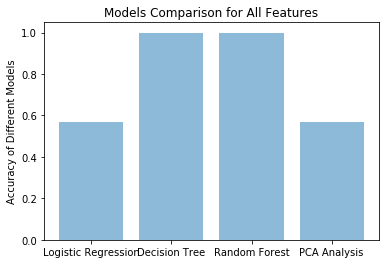

In [51]:
import matplotlib.pyplot as plt
objects=("Logistic Regression","Decision Tree","Random Forest","PCA Analysis")
y_pos=np.arange(len(objects))
performance=[lr_accuracy, dt_accuracy, rf_accuracy, pca_accuracy]

plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Accuracy of Different Models')
plt.title('Models Comparison for All Features')

plt.show()

In [65]:
ln_id = test['LN_ID'].to_list()
beh = test['Behavior'].to_list()
app = test['Approval'].to_list()

result = {'LN_ID': ln_id, 'Score': beh, 'Value': app}
result = pd.DataFrame(result)
result = result.sort_values(['Score'], ascending=[True])

val = result['Value'].to_list()
ap = []
for item in val:
    if item == 0:
        x = 'Very Low Risk'
    elif item == 1:
        x = 'Low Risk'
    elif item == 2:
        x = 'Medium Risk'
    elif item == 3:
        x = 'High Risk'
    elif item == 4:
        x = 'Very High Risk'
    ap.append(x)
result['Value'] = ap
result

,LN_ID,Score,Value
10101,343494,1.023562,Very Low Risk
13456,425177,1.026026,Very Low Risk
3920,196302,1.030000,Very Low Risk
307,107490,1.050000,Very Low Risk
1522,137940,1.050031,Very Low Risk
...,...,...,...
8014,293838,37.150000,Very High Risk
2407,160620,37.258950,Very High Risk
6072,247381,38.097220,Very High Risk
1839,146009,38.170760,Very High Risk


In [66]:
result.to_csv('rank.csv')